# Домашнее задание - 3.

## Часть 1. Теория (5 баллов + бонус).

**Задание 1.** Найдите SVD-разложение матриц (каждый пункт - **0.5 балла**):
![задание 1](https://github.com/Murcha1990/MLDS_math_2022/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BA%D0%B8/practice_03/task1.png?raw=1)

### 1

**Решение 1 пункта:**

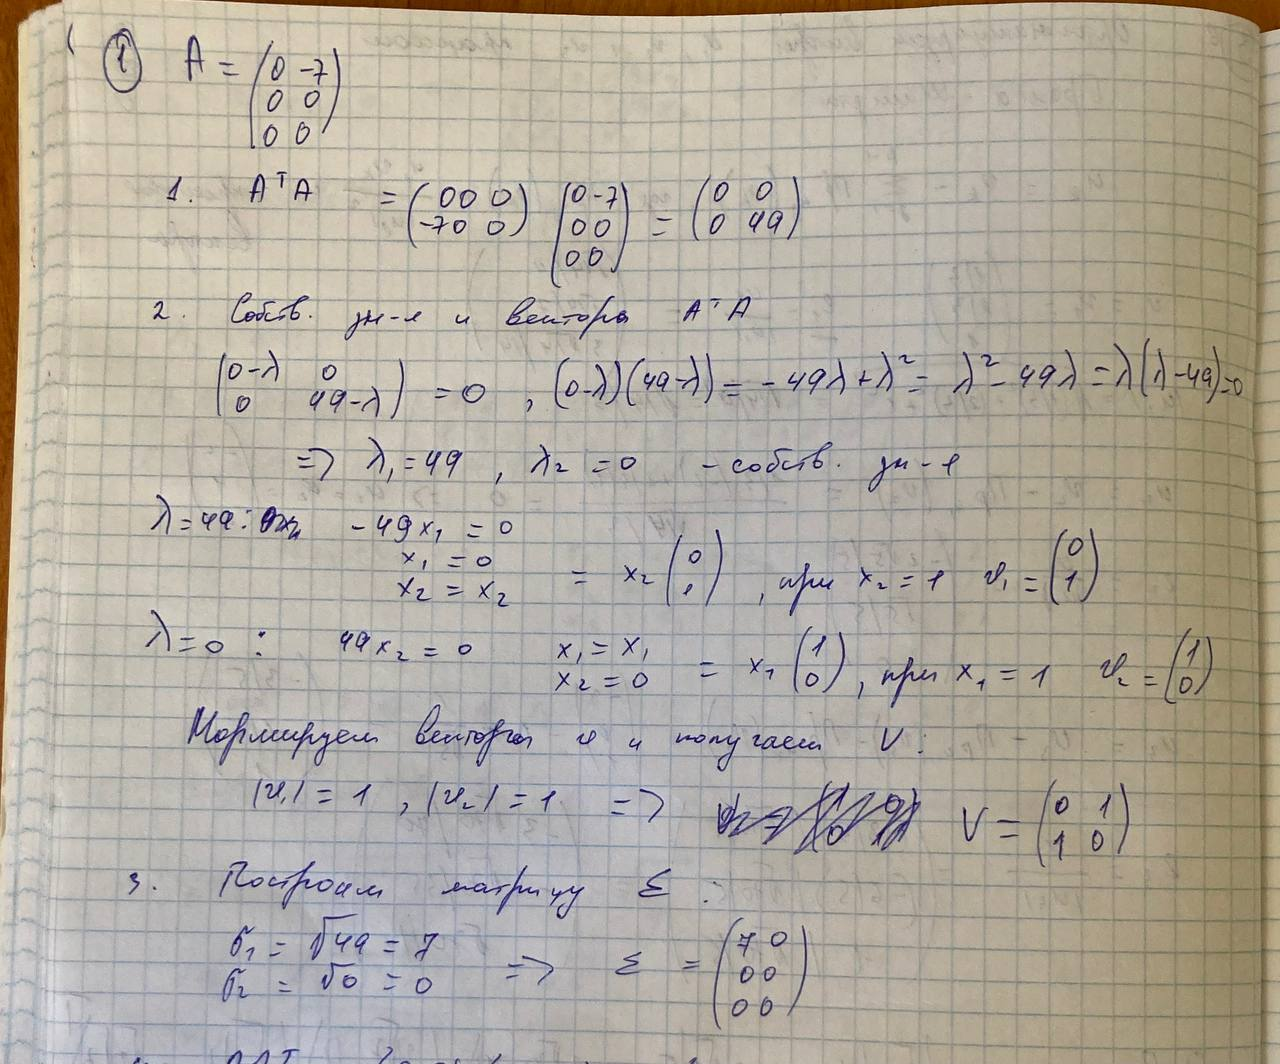

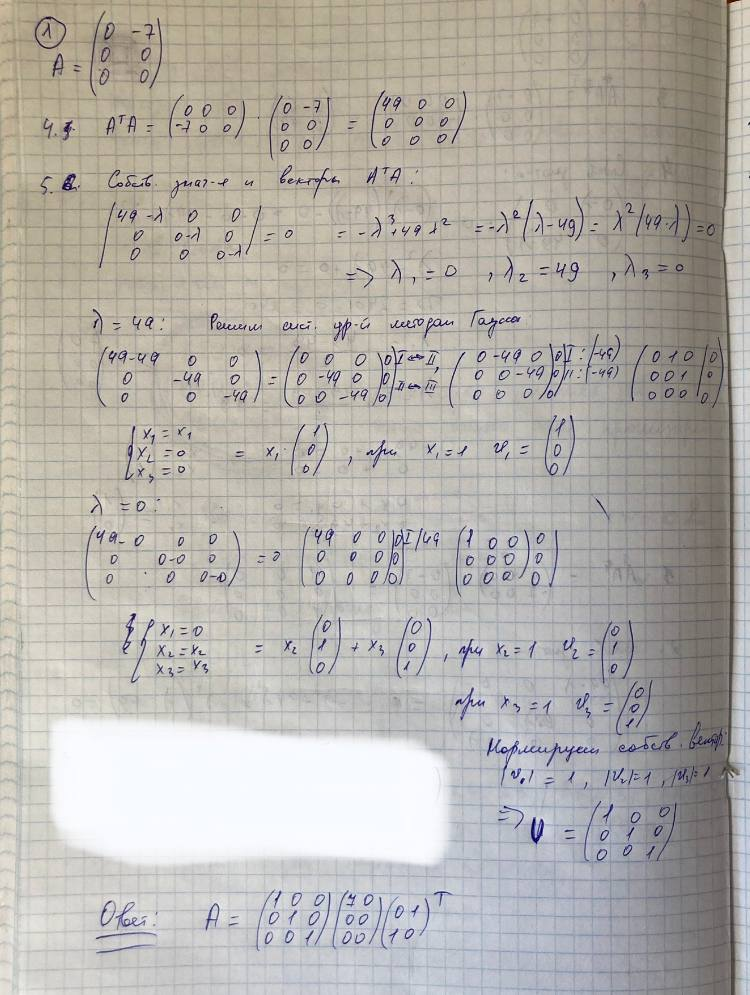

**Решение 2 пункта:**



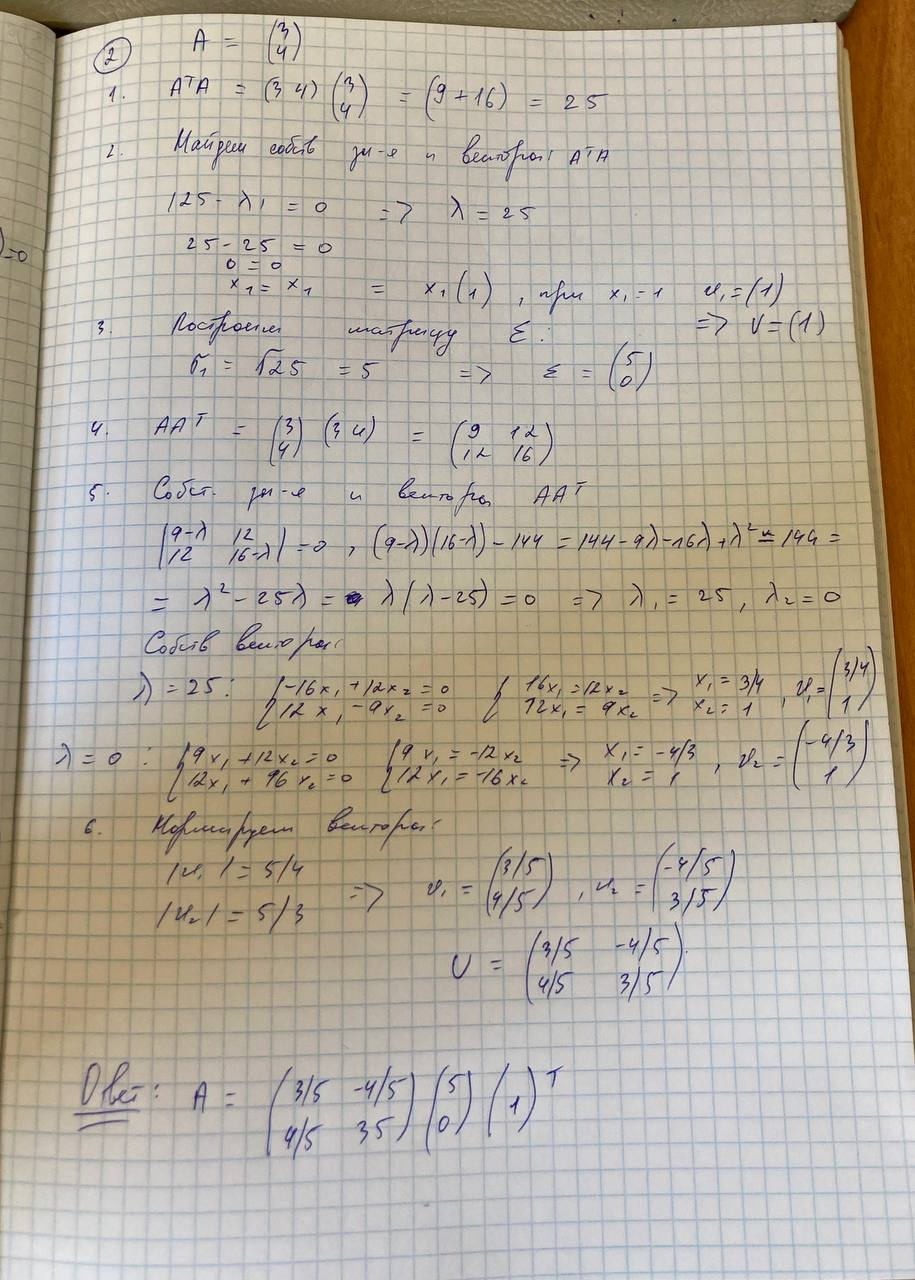

**Решение 3 пункта:**

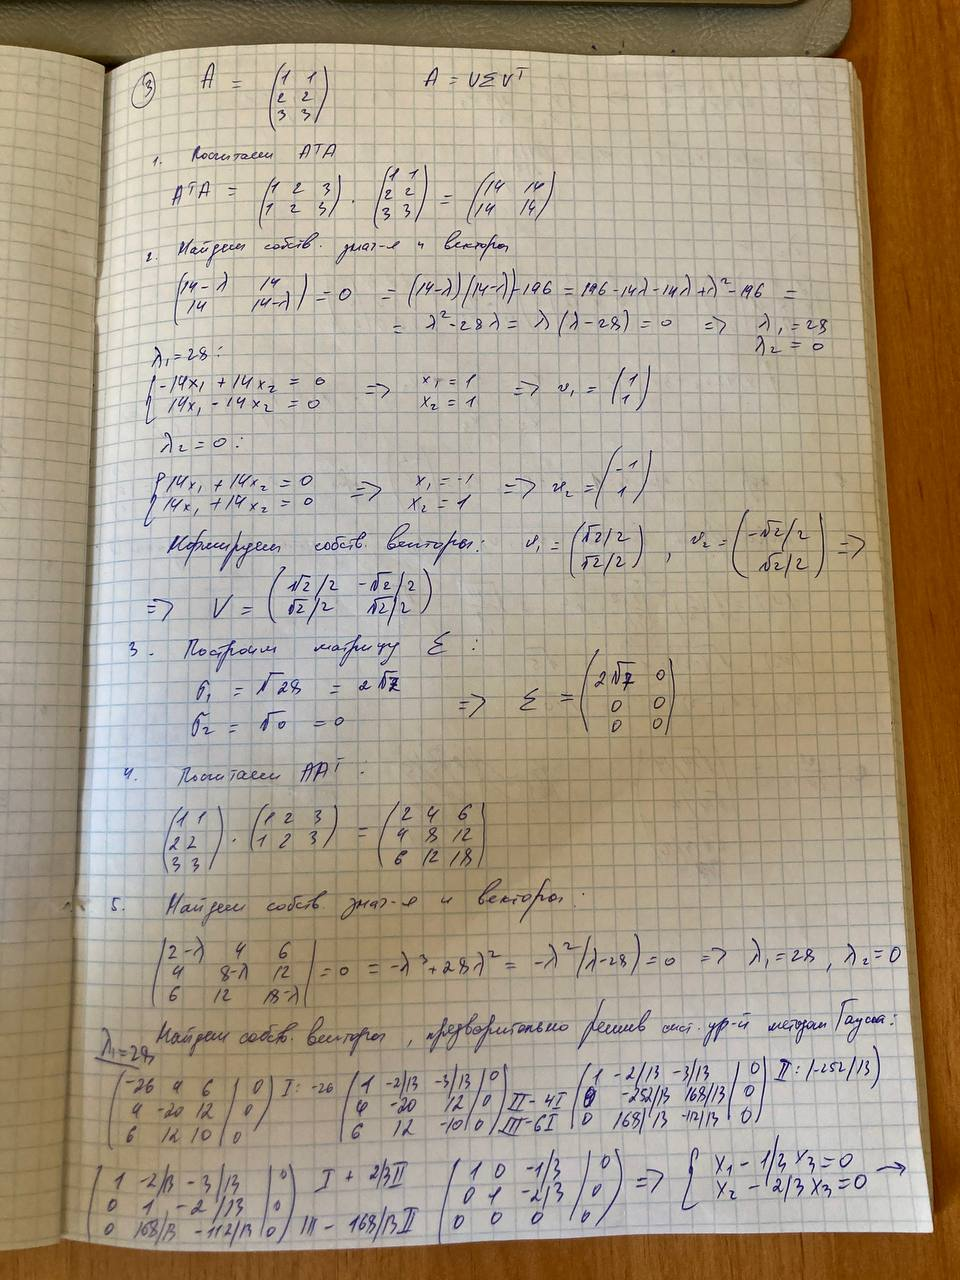

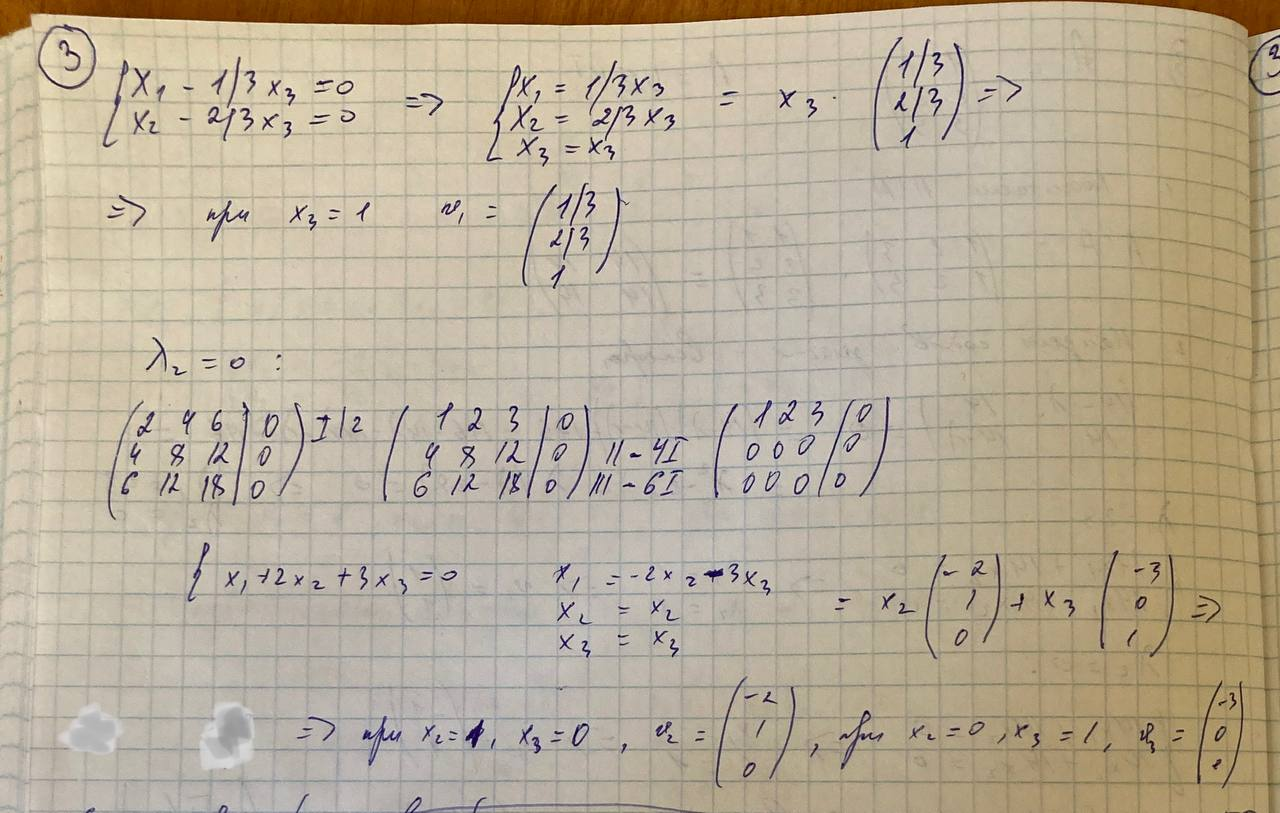

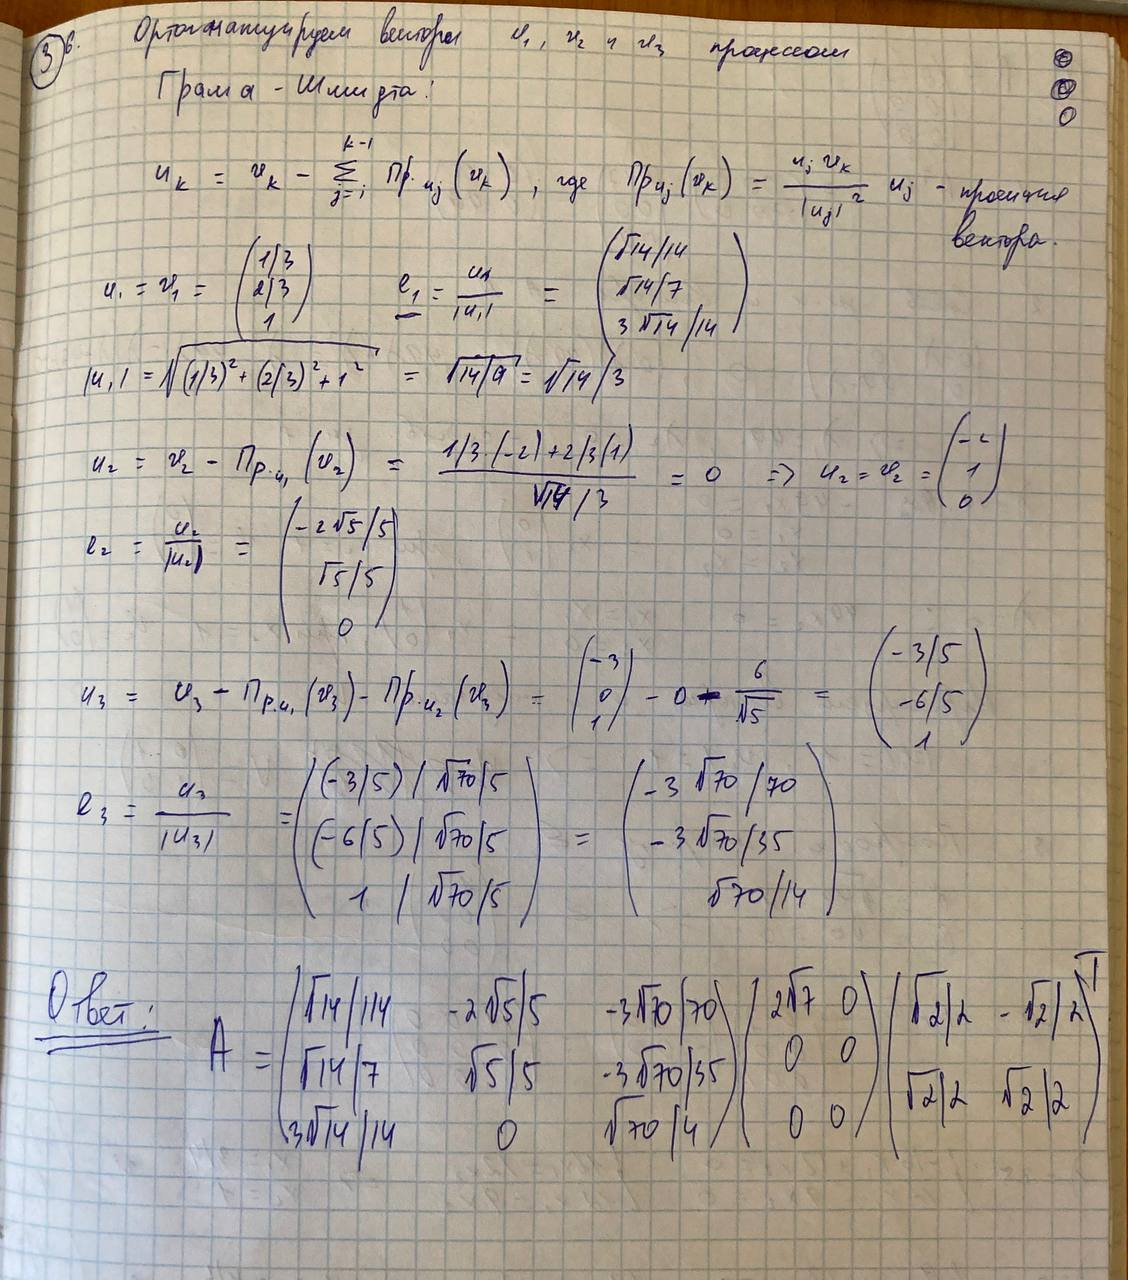

## 2

**Задание 2. (2 балла)** Изучите материалы про QR, LU, SVD и спектральное разложение матриц. Напишите формулу для одного любого разложения (кроме SVD), поясните её, объясните геометрический смысл разложения и его связь с SVD.

**Бонус.** За самостоятельную реализацию алгоритма, осуществляющего выбранное вами разложение в python - **до +3 баллов**.

### 3

**Задание 3. (1 балл)** Некто придумал метод __бесполезных компонент__. Как и в методе главных компонент, новые признаки являются линейными комбинациями исходных. Бесполезные компоненты так же, как и главные - ортогональны между собой и имеют длину 1. В отличие от метода главных компонент, проекция на первую бесполезную компоненту обладает __наименьшей__ дисперсией. Вторая бесполезная компонента ортогональна первой и обладает наименьшей дисперсией при условии ортогональности. И так далее.

Как связаны метод бесполезных компонент и метод главных компонент?

## Практика (6 баллов)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

In [ ]:
import warnings

warnings.filterwarnings('ignore')

Загрузим картинку и нарисуем ее.

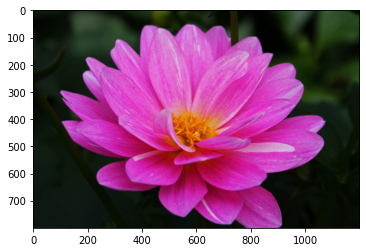

In [ ]:
img = cv2.cvtColor(cv2.imread('flower.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(800, 1200, 3)

Разобъем изображение на цветовые каналы.

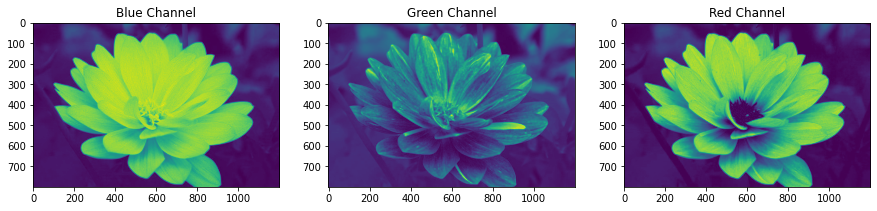

In [ ]:
blue, green, red = cv2.split(img)

fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)

plt.show()

Посмотрим на матрицу одного из каналов.

In [ ]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

0     1     2     3     4     5     6     7     8     9     ...  1190  \
0      10    10    10    10    10    11    11    11    11    11  ...     9   
1      10    10    10    10    10    11    11    11    11    11  ...     9   
2      10    10    10    10    10    11    11    11    11    11  ...     7   
3      10    10    10    10    10    11    11    11    11    11  ...     7   
4      10    10    10    10    10    11    11    11    11    11  ...     7   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
795    12    12    12    12    12    12    12    12    13    13  ...     7   
796    12    12    12    12    12    12    12    12    13    13  ...     7   
797    13    13    13    13    13    13    13    13    13    13  ...     7   
798    13    13    13    13    13    13    13    13    13    13  ...     7   
799    13    13    13    13    13    13    13    13    13    13  ...     7   

     1191  1192  1193  1194  1195  1196  1197  1198  1199  
0       9     9     9     9     9     9     9     9     9  
1       9     9     9     9     9     9     9     9     9  
2       7     7     7     7     7     7     7     7     7  
3       7     6     6     6     6     6     6     6     6  
4       7     6     6     6     6     6     6     6     6  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
795     7     7     7     7     7     7     7     7     7  
796     7     7     7     7     7     7     7     7     7  
797     7     7     7     7     7     7     7     7     7  
798     7     7     7     7     7     7     7     7     7  
799     7     7     7     7     7     7     7     7     7  

[800 rows x 1200 columns]

### Сейчас будем делать PCA

**Задание 4 (0.5 балла).** Масштабируйте данные, поделив значения в таблицах каждого канала на 255

In [ ]:
blue = blue / 255

green = green / 255

red = red / 255

**Задание 5 (1 балл).** Обучите PCA с 50-ю компонентами на каждом канале в отдельности (три раза обучаем). Снизьте размерность каждого канала в отдельности.

In [ ]:
# initialize the models

pca_b = PCA(n_components=50)
pca_g = PCA(n_components=50)
pca_r = PCA(n_components=50)

# train the models

pca_b.fit(blue)
pca_g.fit(green)
pca_r.fit(red)

reduced_blue = pca_b.transform(blue)
reduced_green = pca_g.transform(green)
reduced_red = pca_r.transform(red)

assert np.shape(reduced_blue)[1] == 50
assert np.shape(reduced_green)[1] == 50
assert np.shape(reduced_red)[1] == 50

**Задание 6 (0.5 балла).** Выведите на экран долю дисперсии, объясняемой первыми 50-ю главными компонентами (для каждого канала в отдельности).

In [ ]:
print(f'Доля объясненной дисперсии голубого канала: \n\n{np.round(pca_b.explained_variance_ratio_, 3)}\n')

print(f'Доля объясненной дисперсии зеленого канала: \n\n{np.round(pca_g.explained_variance_ratio_, 3)}\n')

print(f'Доля объясненной дисперсии красного канала: \n\n{np.round(pca_r.explained_variance_ratio_, 3)}')

Доля объясненной дисперсии голубого канала: 

[0.546 0.122 0.087 0.046 0.035 0.028 0.02  0.015 0.014 0.009 0.009 0.007
 0.007 0.006 0.005 0.004 0.004 0.003 0.002 0.002 0.002 0.002 0.002 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.   ]

Доля объясненной дисперсии зеленого канала: 

[0.422 0.13  0.091 0.054 0.042 0.033 0.026 0.018 0.015 0.015 0.012 0.01
 0.009 0.008 0.007 0.006 0.006 0.005 0.005 0.004 0.004 0.004 0.003 0.003
 0.003 0.003 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001]

Доля объясненной дисперсии красного канала: 

[0.383 0.224 0.082 0.057 0.039 0.032 0.026 0.02  0.018 0.015 0.011 0.01
 0.009 0.007 0.007 0.006 0.005 0.004 0.004 0.003 0.003 0.002 0.002 0.002
 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.0

**Задание 7 (0.5 балла).** Нарисуйте для каждого из трех каналов гистограмму, на которой отобразите долю дисперсии, объясняемой каждой из первых 50-ти компонент.

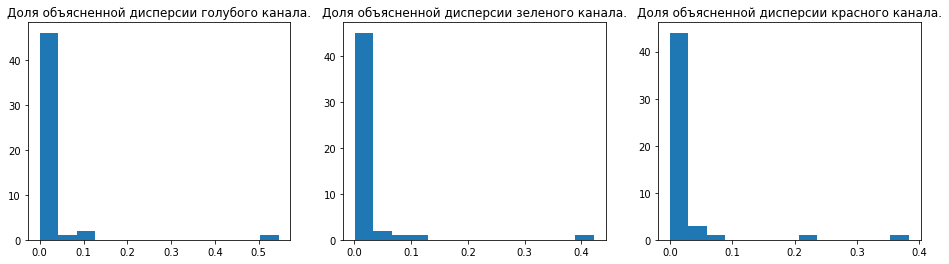

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

axs[0].hist(pca_b.explained_variance_ratio_, bins=13)
axs[1].hist(pca_g.explained_variance_ratio_, bins=13)
axs[2].hist(pca_r.explained_variance_ratio_, bins=13)

axs[0].title.set_text('Доля объясненной дисперсии голубого канала.')
axs[1].title.set_text('Доля объясненной дисперсии зеленого канала.')
axs[2].title.set_text('Доля объясненной дисперсии красного канала.')

plt.show()

### Восстанавливаем изображение

**Задание 8 (1 балл).** Восстановите изображения по каждому каналу в отдельности, используя pca.inverse_transform.

In [ ]:
inversed_blue = pca_b.inverse_transform(reduced_blue)
inversed_green = pca_g.inverse_transform(reduced_green)
inversed_red = pca_r.inverse_transform(reduced_red)

assert np.shape(inversed_blue)[1] == 1200
assert np.shape(inversed_green)[1] == 1200
assert np.shape(inversed_red)[1] == 1200

**Задание 9 (0.5 балла).** Склейте восстановленные одноканальные изображения в цветное трехканальное изображение. Вы получите сжатое изображение

In [ ]:
inversed_image = cv2.merge((inversed_blue, inversed_green, inversed_red))

**Задание 10 (1 балл).** Нарисуйте рядом два изображения: исходное и восстановленное (по своим 50 компонентам). Прокомментируйте текстом результат - упало ли визуально качество при сжатии изображения до 50 главных компонент?

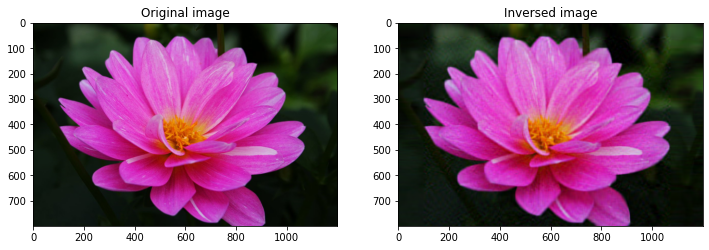

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 10))

axs[0].imshow(img)
axs[1].imshow(inversed_image)

axs[0].title.set_text('Original image')
axs[1].title.set_text('Inversed image')

plt.show()

Качество изображения немного упало, оно стало немного мутным.

**Задание 11 (1 балл).** Подберите минимальное количество компонент, при которых сжатое изображение визуально не отличается от исходного. Подбор происходит перебором, ориентируемся на визуальный результат.

In [ ]:
def find_optimal_ncomponents(image: np.ndarray, n_components: list):
  """
  Функция перебирает различные значения n_components для PCA и визуализирует результат
  """
  # split
  blue, green, red = cv2.split(image)
  # scaling
  blue = blue / 255
  green = green / 255
  red = red / 255
  for n in n_components:
    print(f'\nn_components={n}\n')
    # initialize the models
    pca_b = PCA(n_components=n)
    pca_g = PCA(n_components=n)
    pca_r = PCA(n_components=n)
    # train the models
    pca_b.fit(blue)
    pca_g.fit(green)
    pca_r.fit(red)
    # reduction
    reduced_blue = pca_b.transform(blue)
    reduced_green = pca_g.transform(green)
    reduced_red = pca_r.transform(red)

    assert np.shape(reduced_blue)[1] == n
    assert np.shape(reduced_green)[1] == n
    assert np.shape(reduced_red)[1] == n

    # inverse image
    inversed_blue = pca_b.inverse_transform(reduced_blue)
    inversed_green = pca_g.inverse_transform(reduced_green)
    inversed_red = pca_r.inverse_transform(reduced_red)

    assert np.shape(inversed_blue)[1] == image.shape[1]
    assert np.shape(inversed_green)[1] == image.shape[1]
    assert np.shape(inversed_red)[1] == image.shape[1]

    inversed_image = cv2.merge((inversed_blue, inversed_green, inversed_red))

    # visualisation
    fig, axs = plt.subplots(1, 2, figsize=(12, 10))

    axs[0].imshow(image)
    axs[1].imshow(inversed_image)

    axs[0].title.set_text('Original image')
    axs[1].title.set_text('Inversed image')

    plt.show()


n_components=50



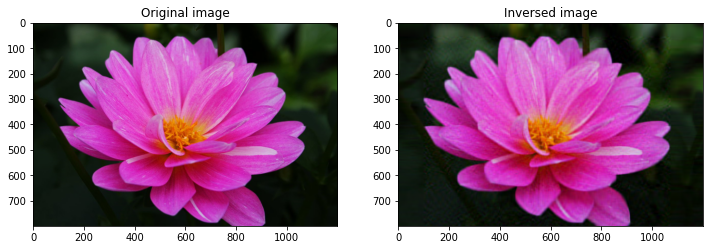


n_components=55



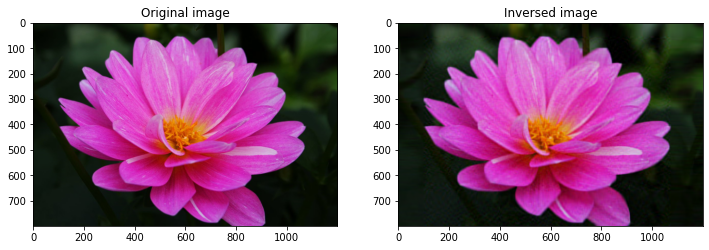


n_components=60



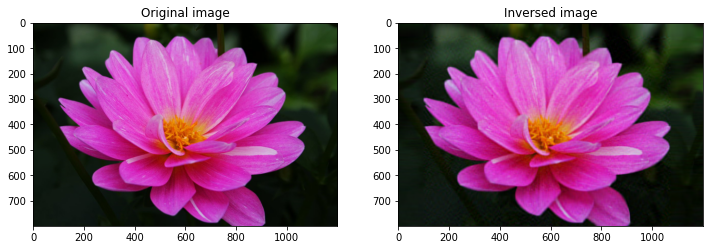


n_components=65



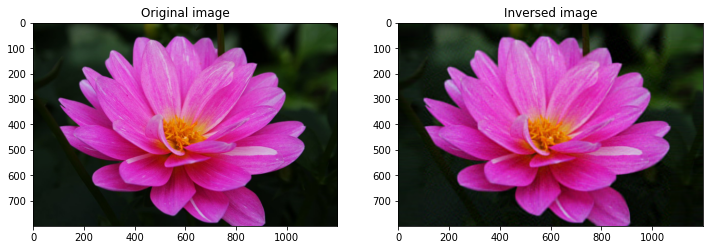


n_components=70



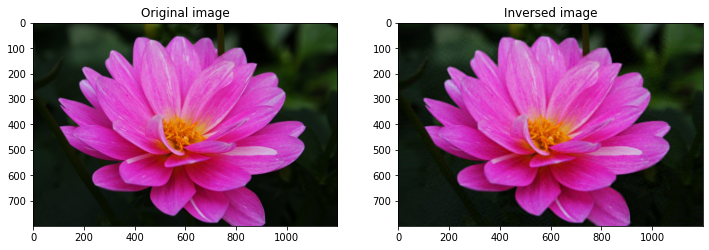


n_components=75



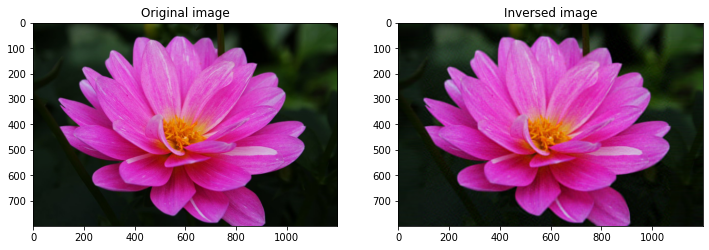


n_components=80



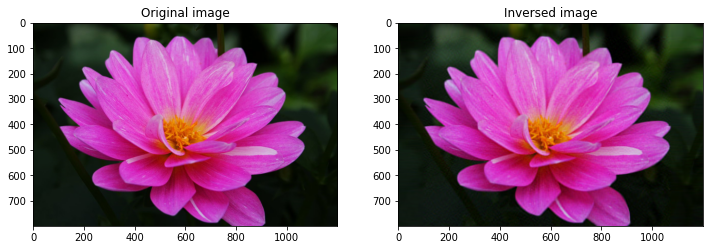


n_components=85



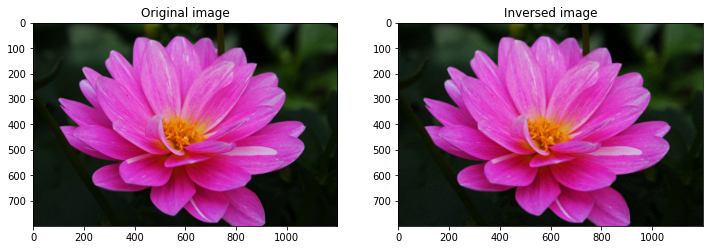


n_components=90



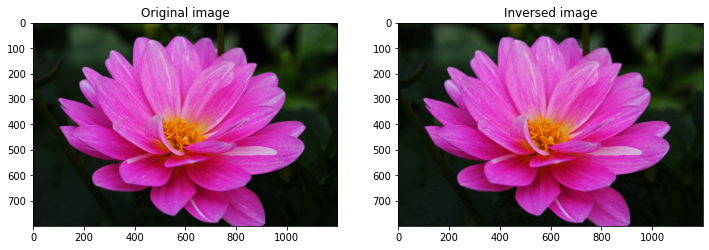


n_components=95



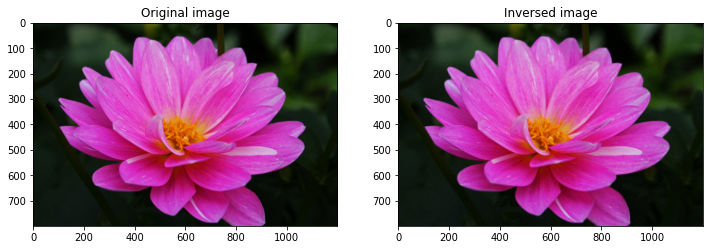


n_components=100



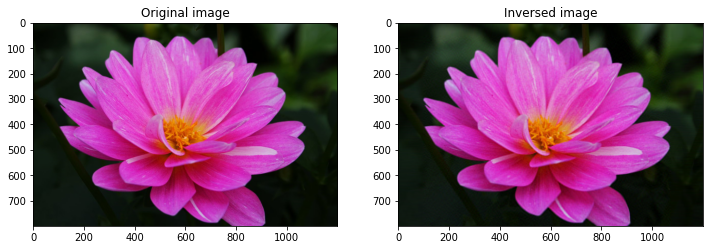

In [ ]:
find_optimal_ncomponents(img, range(50, 101, 5))

При **n_components=80-85**, визуальные различия полностью уходят.